#  AI for practitioners

## Unsupervised Learning [K-Means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) [sklearn]

The KMeans algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares. This algorithm requires the number of clusters to be specified. It scales well to large number of samples and has been used across a large range of application areas in many different fields.

K-means is often referred to as Lloyd’s algorithm. In basic terms, the algorithm has three steps. The first step chooses the initial centroids, with the most basic method being to choose  samples from the dataset . After initialization, K-means consists of looping between the two other steps. The first step assigns each sample to its nearest centroid. The second step creates new centroids by taking the mean value of all of the samples assigned to each previous centroid. The difference between the old and the new centroids are computed and the algorithm repeats these last two steps until this value is less than a threshold. In other words, it repeats until the centroids do not move significantly.


### Advantages
------------------------------------------------------------
- Easy to understand
- Scalable to large datasets
- Many different applications!

### Disadvantages
------------------------------------------------------------
- How to set k?
- Unable to discover certain types of clusters (elongated, encompassing...)

### The parameters include
------------------------------------------------------------
- k: the numer of cluster centers

In [1]:
%matplotlib inline
import os

import numpy as np
import pandas as pd
import csv

from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# bigger plots
plt.rcParams['figure.figsize'] = [20, 15]

In [3]:
import os

# Download the data from our GitLab page
!wget https://gitlab.com/CBDS/kennisgebied_ai/-/raw/master/data/kwb-2018-toelichting.csv
!wget https://gitlab.com/CBDS/kennisgebied_ai/-/raw/master/data/kwb-2018.csv

data_directory = os.path.join('/content/')

--2023-11-21 10:10:34--  https://gitlab.com/CBDS/kennisgebied_ai/-/raw/master/data/kwb-2018-toelichting.csv
Resolving gitlab.com (gitlab.com)... 172.65.251.78, 2606:4700:90:0:f22e:fbec:5bed:a9b9
Connecting to gitlab.com (gitlab.com)|172.65.251.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3375 (3.3K) [text/plain]
Saving to: ‘kwb-2018-toelichting.csv’

kwb-2018-toelichtin 100%[===================>]   3.30K  --.-KB/s    in 0s      

2023-11-21 10:10:34 (79.0 MB/s) - ‘kwb-2018-toelichting.csv’ saved [3375/3375]

--2023-11-21 10:10:34--  https://gitlab.com/CBDS/kennisgebied_ai/-/raw/master/data/kwb-2018.csv
Resolving gitlab.com (gitlab.com)... 172.65.251.78, 2606:4700:90:0:f22e:fbec:5bed:a9b9
Connecting to gitlab.com (gitlab.com)|172.65.251.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3774153 (3.6M) [text/plain]
Saving to: ‘kwb-2018.csv’

kwb-2018.csv        100%[===================>]   3.60M  --.-KB/s    in 0.06s   

2023-11-2

# Example: Real (CBS) data

In [4]:
column_reference_table = {}
with open(os.path.join(data_directory, "kwb-2018-toelichting.csv")) as file:
    reader = csv.reader(file, delimiter=';')
    for row in reader:
        column_reference_table[row[0]] = row[1]

#### Get a better description of a column name

In [5]:
column_reference_table['a_opp_ha']

'Oppervlakte totaal'

In [6]:
column_reference_table['a_inw']

'Aantal inwoners'

#### Read the actual data: CBS 'gemeente / wijk / buurt statistieken'

In [7]:
with open(os.path.join(data_directory, "kwb-2018.csv"), encoding="cp1252") as file:
    data = pd.read_csv(file, sep =';')
print(f"The available features:\t {list(data)}")

The available features:	 ['gwb_code_10', 'gwb_code_8', 'regio', 'gm_naam', 'recs', 'gwb_code', 'ind_wbi', 'a_inw', 'a_man', 'a_vrouw', 'a_00_14', 'a_15_24', 'a_25_44', 'a_45_64', 'a_65_oo', 'a_ongeh', 'a_gehuwd', 'a_gesch', 'a_verwed', 'a_w_all', 'a_nw_all', 'a_marok', 'a_antaru', 'a_suri', 'a_tur', 'a_ov_nw', 'a_hh', 'a_1p_hh', 'a_hh_z_k', 'a_hh_m_k', 'g_hhgro', 'bev_dich', 'a_woning', 'g_woz', 'p_1gezw', 'p_mgezw', 'p_bewndw', 'p_leegsw', 'p_koopw', 'p_huurw', 'p_wcorpw', 'p_ov_hw', 'p_e_o_w', 'p_bjj2k', 'p_bjo2k', 'a_pau', 'a_bst_b', 'a_bst_nb', 'g_pau_hh', 'g_pau_km', 'a_m2w', 'a_opp_ha', 'a_lan_ha', 'a_wat_ha', 'ste_mvs', 'ste_oad']


#### There are different types of regions in the dataset

In [8]:
data['recs'].unique()

array(['Land', 'Gemeente', 'Wijk', 'Buurt'], dtype=object)

In [9]:
selected_region_type = 'Gemeente'

In [10]:
data_for_selected_region_type = data[data.recs == selected_region_type]
data_for_selected_region_type.shape

(380, 56)

### Devise a two dimensional unsupervised dataset, no target variable

In [11]:
feature_names = ['a_inw','a_opp_ha']
for feature in feature_names:
    print(column_reference_table[feature])

Aantal inwoners
Oppervlakte totaal


In [12]:
unsupervised_data = data_for_selected_region_type[feature_names]
unsupervised_data.shape

(380, 2)

#### Now find the clusters

In [13]:
k = 10

In [14]:
kmeans = KMeans(n_clusters=k).fit(unsupervised_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


These are the cluster centers after fitting to the data

In [15]:
kmeans.cluster_centers_

array([[ 59175.42307692,   9021.21153846],
       [585636.5       ,  21114.5       ],
       [ 14677.70247934,   6382.61157025],
       [347483.        ,   9921.        ],
       [175571.35714286,  12938.57142857],
       [854047.        ,  21949.        ],
       [105468.95238095,  11494.04761905],
       [ 31062.93650794,   7422.46825397],
       [ 28523.24324324,  30626.10810811],
       [ 62604.        ,  69585.6       ]])

Using the 'predict' function, we can now assign a label (i.e., cluster) to each of the 380 'gemeentes'

In [16]:
predictions = kmeans.predict(unsupervised_data).tolist()
predictions[0:10]

[2, 2, 2, 8, 4, 2, 2, 2, 2, 2]

In [17]:
df_predictions = pd.DataFrame({"cluster" : predictions})

In [18]:
print(f"Shape of unsupervised data is {unsupervised_data.shape}")
print(f"Shape of cluster data is {df_predictions.shape}")

Shape of unsupervised data is (380, 2)
Shape of cluster data is (380, 1)


In [19]:
unsupervised_data_w_cluster = unsupervised_data

# assign cluster to dataset
unsupervised_data_w_cluster = unsupervised_data_w_cluster.assign(cluster = df_predictions.values)

# assign the name of gemeente to dataset
unsupervised_data_w_cluster = unsupervised_data_w_cluster.assign(gm_naam = data_for_selected_region_type['gm_naam'].values)

unsupervised_data_w_cluster.head(4)

a_inw  a_opp_ha  cluster     gm_naam
1   11801      2458        2  Appingedam
9   10475      4496        2       Bedum
19   7292      4573        2    Ten Boer
34  24864     22750        8    Delfzijl

### Visualize clusters (2-dimensional)

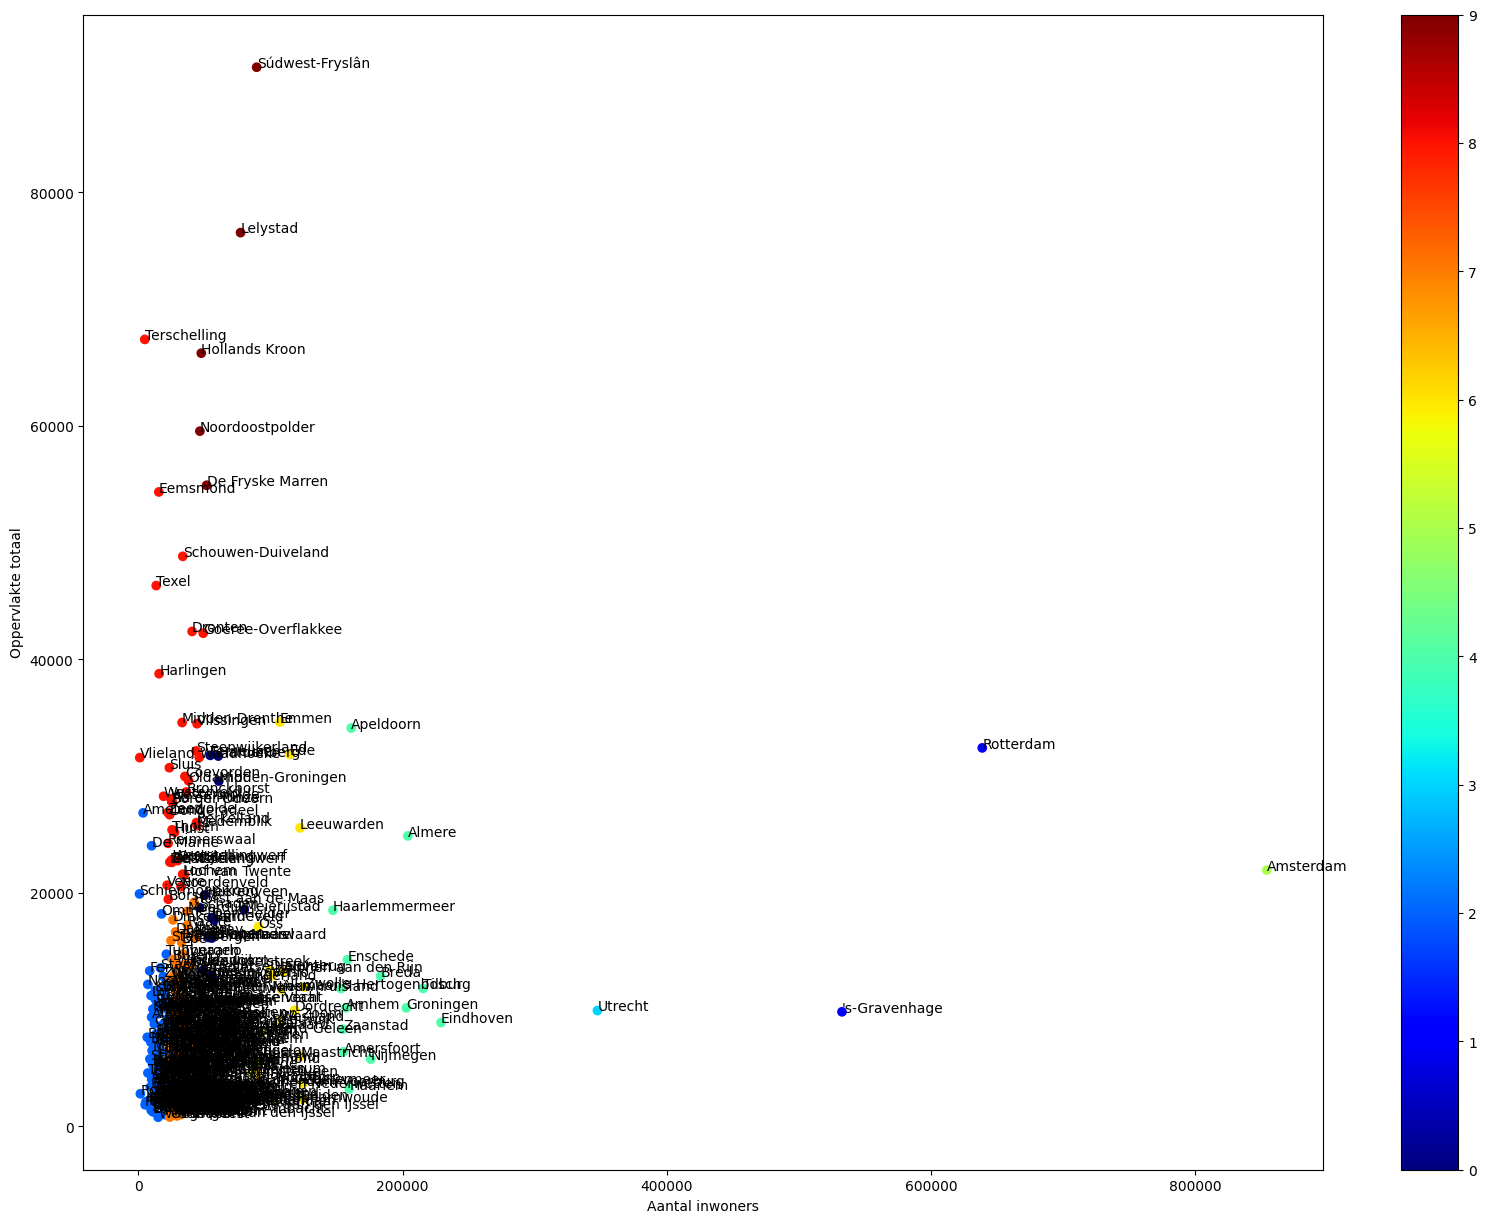

In [20]:
feature_one = feature_names[0]
feature_two = feature_names[1]

plt.scatter(unsupervised_data_w_cluster[feature_one], unsupervised_data_w_cluster[feature_two], c=unsupervised_data_w_cluster['cluster'], cmap=cm.jet)
plt.colorbar()
plt.xlabel(column_reference_table[feature_one])
plt.ylabel(column_reference_table[feature_two])

# comment out for not showing labels
for i, txt in enumerate(unsupervised_data_w_cluster['gm_naam']):
    x_co = unsupervised_data_w_cluster.iloc[i][feature_one]
    y_co = unsupervised_data_w_cluster.iloc[i][feature_two]
    plt.annotate(txt, (x_co, y_co))

#### Let us predict the cluster for New York, with number of inhabitants 8,622,698 and total land 468.484

In [21]:
new_york_cluster = kmeans.predict(
                            pd.DataFrame({'a_inw':8622698,
                                          'a_opp_ha':468484},
                                         index=[0]))[0]
print('The cluster where New York belongs to is: ', new_york_cluster)

The cluster where New York belongs to is:  5


In [22]:
unsupervised_data

a_inw  a_opp_ha
1       11801      2458
9       10475      4496
19       7292      4573
34      24864     22750
64     202810     10150
...       ...       ...
16359   80148     18552
16457   46112     31601
16558   24684     28065
16628   60951     29577
16741   35627     10664

[380 rows x 2 columns]

#### Which Dutch citiers are most like New York?

In [23]:
unsupervised_data_w_cluster[unsupervised_data_w_cluster.cluster==new_york_cluster]

a_inw  a_opp_ha  cluster    gm_naam
5156  854047     21949        5  Amsterdam

### Visualize clusters (3-dimensional)

In [24]:
feature_names = ['a_inw', 'a_opp_ha', 'a_w_all']
unsupervised_data = data_for_selected_region_type[feature_names]

k = 10
kmeans = KMeans(n_clusters=k).fit(unsupervised_data)

predictions = kmeans.predict(unsupervised_data).tolist()
df_predictions = pd.DataFrame({"cluster" : predictions})

# assign cluster to dataset
unsupervised_data_w_cluster = unsupervised_data
unsupervised_data_w_cluster = unsupervised_data_w_cluster.assign(cluster = df_predictions.values)

# assign the name of gemeente to dataset
unsupervised_data_w_cluster = unsupervised_data_w_cluster.assign(gm_naam = data_for_selected_region_type['gm_naam'])
unsupervised_data_w_cluster.head(4)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


a_inw  a_opp_ha  a_w_all  cluster     gm_naam
1   11801      2458      869        5  Appingedam
9   10475      4496      452        5       Bedum
19   7292      4573      308        5    Ten Boer
34  24864     22750     1911        7    Delfzijl

In [25]:
feature_one = feature_names[0]
feature_two = feature_names[1]
feature_three = feature_names[2]

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter(unsupervised_data_w_cluster[feature_one], unsupervised_data_w_cluster[feature_two], unsupervised_data_w_cluster[feature_three], c=unsupervised_data_w_cluster['cluster'])

ax.set_xlim3d(0,80000)
ax.set_ylim3d(1000,30000)
ax.set_zlim3d(0,10000)

plt.show()

<Figure size 2000x1500 with 0 Axes>

In [25]:
column_reference_table[feature_one], column_reference_table[feature_two], column_reference_table[feature_three]